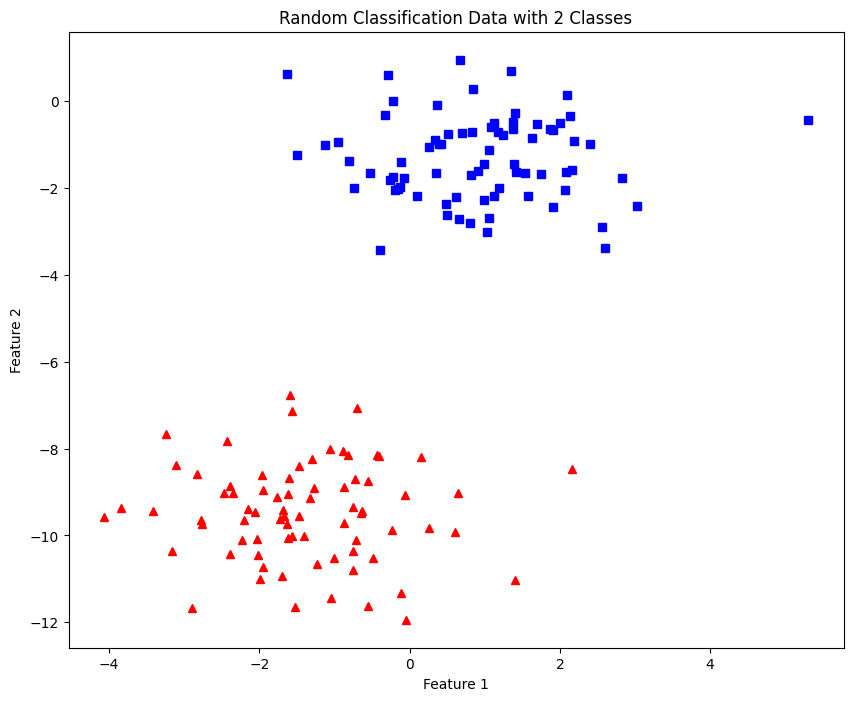

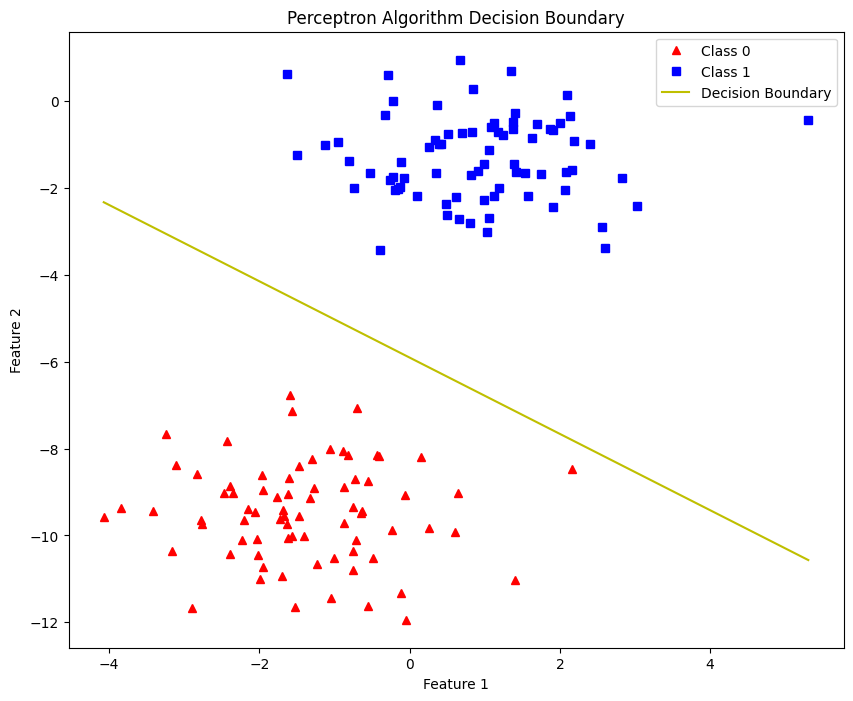

In [ ]:
import numpy as np # type: ignore
from sklearn import datasets# type: ignore
import matplotlib.pyplot as plt# type: ignore

X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)

plt.figure(figsize=(10, 8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label="Class 0")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Random Classification Data with 2 Classes')
plt.show()

def step_func(z):
    return 1 if z > 0 else 0

def perceptron(X, y, lr=0.5, epochs=100):
    m, n = X.shape 
    # print(f"m={m} n= {n}")
    theta = np.zeros(n + 1) 
    # print(theta)
    n_miss_list = []

    for epoch in range(epochs):
        n_miss = 0  

        for i in range(m):
            x_i = np.insert(X[i], 0, 1)  
            # print(f"x_i = {x_i} ")
            y_hat = step_func(np.dot(x_i, theta)) 
            # print(f"y_hat = {y_hat} \n") 
            if y_hat != y[i]:
                theta = theta+ lr * (y[i] - y_hat) * x_i
                n_miss = n_miss+ 1

        n_miss_list.append(n_miss) 

    return theta, n_miss_list

def plot_decision_boundary(X, theta):
    x1_vals = np.array([min(X[:, 0]), max(X[:, 0])]) 
    m = -theta[1] / theta[2]
    c = -theta[0] / theta[2]
    x2_vals = m * x1_vals + c

    plt.figure(figsize=(10, 8))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "r^", label="Class 0")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Class 1")
    plt.plot(x1_vals, x2_vals, 'y-', label="Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title('Perceptron Algorithm Decision Boundary')
    plt.legend()
    plt.show()

theta, miss_l = perceptron(X, y)
plot_decision_boundary(X, theta)
